# MLP Regressor using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm Multi-Layered Perceptron as a Regressor algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

Using TensorFlow backend.
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarn

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset,position):
    dataset.iloc[:,position:] = dataset.iloc[:,position:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset,4)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Initialize Test Set (Home | BLE)

In [5]:
test_dataset_ble  = load_file('../radiomap_home_BluetoothWiFi.csv')
test_dataset_ble  = replace_features_nan(test_dataset_ble,3)
display(test_dataset_ble)
display(test_dataset_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69.0,-68.0,-69.0,-72.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70.0,-66.0,-66.0,-70.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-88.0,-87.0,-76.0
2,526,-2.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,527,-2.0,0.5,-65.0,-66.0,-66.0,-70.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66.0,-66.0,-66.0,-71.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65.0,-68.0,-68.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-76.0,NaN,-87.0,-76.0,NaN
126,650,-2.0,-1.5,-66.0,-67.0,-64.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-88.0,-80.0,NaN
127,651,-2.0,-1.5,-65.0,-68.0,-66.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-96.0,-76.0,NaN
128,652,-2.0,-1.5,-65.0,-68.0,-66.0,NaN,-72.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-86.0,-76.0,NaN


(130, 18)

In [6]:
test_dataset_home_ble = load_file('../radiomap_home_Bluetooth.csv')
test_dataset_home_ble = replace_features_nan(test_dataset_home_ble,3)
display(test_dataset_home_ble)
display(test_dataset_home_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,NaN
1,391,-2.0,0.5,-84,-80,NaN
2,392,-2.0,0.5,-84,-85,NaN
3,393,-2.0,0.5,-84,-84,NaN
4,394,-2.0,0.5,-90,-81,NaN
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,NaN
126,517,-2.0,-1.5,-81,-90,NaN
127,518,-2.0,-1.5,-80,-88,NaN
128,519,-2.0,-1.5,-81,-87,NaN


(130, 6)

### Dataset Overall Info

In [7]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [8]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [9]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    total_amount = dataset.count() + dataset.isnull().sum()
    total_pd = pd.DataFrame(total_amount,columns=['Samples'])
    missing_percentage = (dataset.isnull().sum() / (dataset.count() + dataset.isnull().sum()))
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(total_pd).join(missing_percentage_dataset)
    display(missing_dataset)
    return missing_dataset

In [10]:
missing_dataset = compute_missing_values(dataset)

,Missing Values,Samples,% of Missing Values
Fingerprint ID,0,750,0.000000
coordinate_X,0,750,0.000000
coordinate_Y,0,750,0.000000
zone,0,750,0.000000
f0:5c:19:94:1a:40,120,750,0.160000
f0:5c:19:94:1a:41,116,750,0.154667
f0:5c:19:94:1a:42,115,750,0.153333
34:fc:b9:18:e4:c1,561,750,0.748000
34:fc:b9:18:e4:c0,605,750,0.806667
34:fc:b9:18:e4:c2,572,750,0.762667


### Overall Histogram of dataset atributes

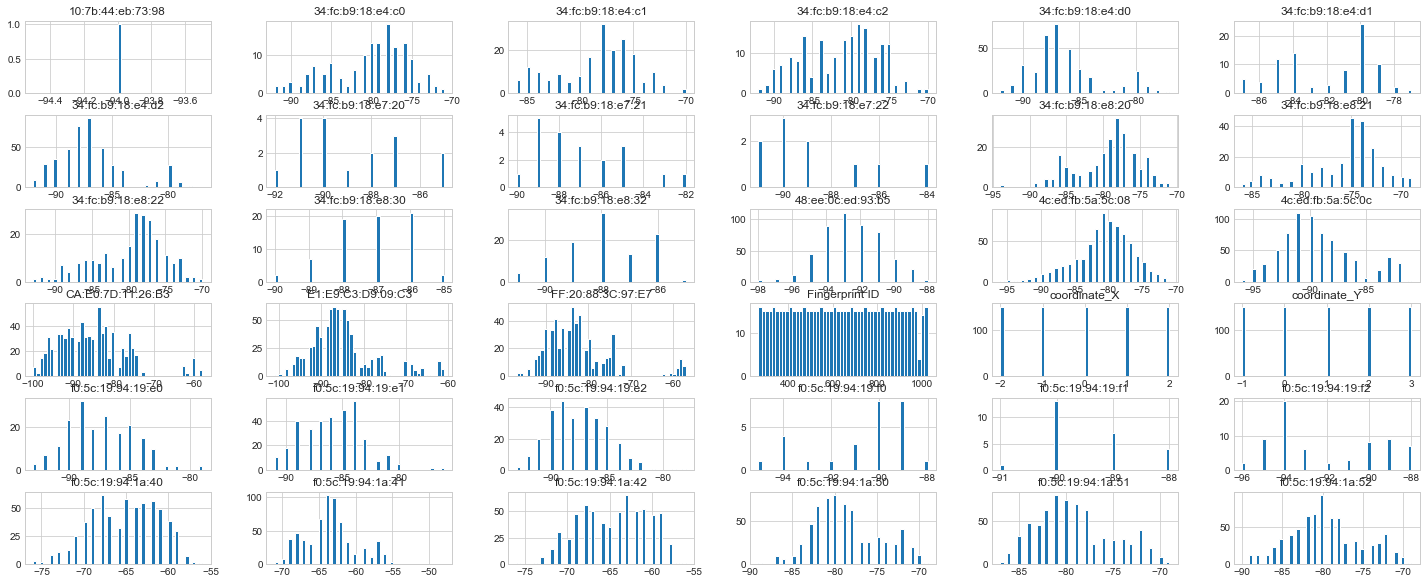

In [11]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Reference Points
Graphical display of the reference points scanned in the experiment

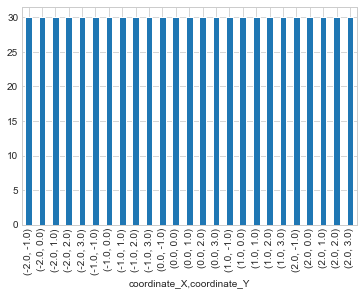

In [12]:
reference_points = dataset.groupby(['coordinate_X','coordinate_Y'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,-80.0,-80.0,-80.0,-89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,-80.0,-81.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-63.0,-62.0,-62.0,NaN,NaN,NaN,-80.0,-79.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.0,-61.0,-63.0,NaN,NaN,NaN,-81.0,-81.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,-80.0,-80.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0
746,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-74.0,-73.0,-83.0,...,-86.0,NaN,NaN,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0
747,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0
748,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,-72.0,-73.0,-83.0,...,-85.0,NaN,NaN,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN


<BarContainer object of 30 artists>

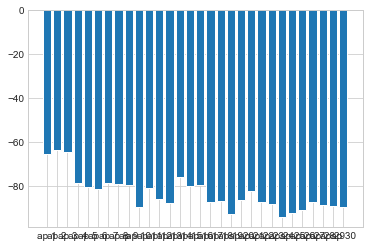

In [13]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.isupper() == True:
        first_beacon_index = list(dataset).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
display(dataset.iloc[:,4:first_beacon_index])
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


<BarContainer object of 3 artists>

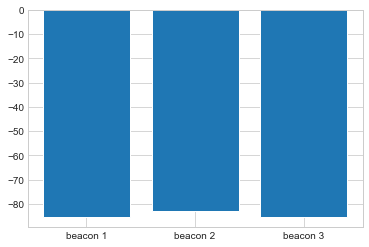

In [14]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,first_beacon_index:]
display(beacons)
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

### Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

#### Wifi Signal Strength

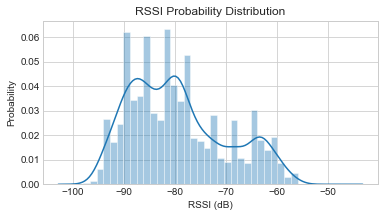

In [15]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
sns.distplot(dataset.iloc[:,4:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

#### Bluetooth Signal Strength

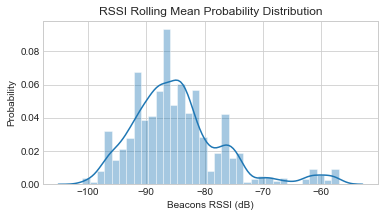

In [16]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [17]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [18]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers (Current approach is using the minimum global scanned value)

In [19]:
def compute_data_cleaning_with_local_minimum(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [20]:
def compute_data_cleaning_with_global_minimum(dataset,position,index):
    numpy_arr_wifi=dataset.iloc[:,position:index].to_numpy()
    numpy_arr_ble=dataset.iloc[:,index:].to_numpy()
    nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,index:] = dataset.iloc[:,index:].fillna(nan_filler_ble)
    dataset.iloc[:,position:index] = dataset.iloc[:,position:index].fillna(nan_filler_wifi)
    print("MINIMUM WIFI: "+ str(nan_filler_wifi))
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [21]:
def compute_data_cleaning_with_global_minimum_only_ble(dataset,position,index):
    numpy_arr_ble=dataset.iloc[:,index:].to_numpy()
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,index:] = dataset.iloc[:,index:].fillna(nan_filler_ble)
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [22]:
compute_data_cleaning_with_global_minimum(dataset,4,first_beacon_index)
display(dataset)

MINIMUM WIFI: -98.98
MINIMUM BLE: -102.01


,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


In [23]:
first_beacon_index_test_dataset  = -1
for ap in test_dataset_ble.iloc[:,3:]:
    if ap.isupper() == True:
        first_beacon_index_test_dataset = list(test_dataset_ble).index(ap)
        break
display(test_dataset_ble.iloc[:,first_beacon_index_test_dataset:])

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.0,-83.0
1,-88.0,-87.0,-76.0
2,NaN,NaN,NaN
3,-86.0,-87.0,-81.0
4,-92.0,-91.0,NaN
...,...,...,...
125,-87.0,-76.0,NaN
126,-88.0,-80.0,NaN
127,-96.0,-76.0,NaN
128,-86.0,-76.0,NaN


In [24]:
compute_data_cleaning_with_global_minimum(test_dataset_ble,3,first_beacon_index_test_dataset)
display(test_dataset_ble)

MINIMUM WIFI: -81.81
MINIMUM BLE: -101.0


,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69.00,-68.00,-69.00,-72.00,-73.00,-72.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70.00,-66.00,-66.00,-70.00,-73.00,-72.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-88.0,-87.0,-76.0
2,526,-2.0,0.5,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-101.0,-101.0,-101.0
3,527,-2.0,0.5,-65.00,-66.00,-66.00,-70.00,-81.81,-68.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66.00,-66.00,-66.00,-71.00,-81.81,-68.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-92.0,-91.0,-101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65.00,-68.00,-68.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-76.00,-81.81,-87.0,-76.0,-101.0
126,650,-2.0,-1.5,-66.00,-67.00,-64.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-88.0,-80.0,-101.0
127,651,-2.0,-1.5,-65.00,-68.00,-66.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-96.0,-76.0,-101.0
128,652,-2.0,-1.5,-65.00,-68.00,-66.00,-81.81,-72.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-86.0,-76.0,-101.0


In [25]:
first_beacon_index_test_dataset_v2  = -1
for ap in test_dataset_home_ble.iloc[:,3:]:
    if ap.isupper() == True:
        first_beacon_index_test_dataset_v2 = list(test_dataset_home_ble).index(ap)
        break
display(test_dataset_home_ble.iloc[:,first_beacon_index_test_dataset_v2:])

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,NaN
1,-84,-80,NaN
2,-84,-85,NaN
3,-84,-84,NaN
4,-90,-81,NaN
...,...,...,...
125,-80,-88,NaN
126,-81,-90,NaN
127,-80,-88,NaN
128,-81,-87,NaN


In [26]:
compute_data_cleaning_with_global_minimum_only_ble(test_dataset_home_ble,3,first_beacon_index_test_dataset_v2)
display(test_dataset_home_ble)

MINIMUM BLE: -95.95


,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,-95.95
1,391,-2.0,0.5,-84,-80,-95.95
2,392,-2.0,0.5,-84,-85,-95.95
3,393,-2.0,0.5,-84,-84,-95.95
4,394,-2.0,0.5,-90,-81,-95.95
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,-95.95
126,517,-2.0,-1.5,-81,-90,-95.95
127,518,-2.0,-1.5,-80,-88,-95.95
128,519,-2.0,-1.5,-81,-87,-95.95


### Initialize Training Data
Training Data intialization for predictions purposes

In [27]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-86.00,-98.98,-98.98,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-85.00,-98.98,-98.98,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98


(750, 30)

In [28]:
train_ble = dataset.iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


(750, 3)

In [29]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


(750, 33)

In [30]:
train_Y = dataset.iloc[:,1:3]
display(train_Y)
display(train_Y.shape)

,coordinate_X,coordinate_Y
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,3.0
4,1.0,3.0
...,...,...
745,2.0,3.0
746,2.0,3.0
747,2.0,3.0
748,2.0,3.0


(750, 2)

### Initialize Test Data

In [31]:
test_ble_X = test_dataset_ble.iloc[:,first_beacon_index_test_dataset:]
display(test_ble_X)
display(test_ble_X.shape)
test_ble_Y = test_dataset_ble.iloc[:,1:3]
display(test_ble_Y)
display(test_ble_Y.shape)

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.0,-83.0
1,-88.0,-87.0,-76.0
2,-101.0,-101.0,-101.0
3,-86.0,-87.0,-81.0
4,-92.0,-91.0,-101.0
...,...,...,...
125,-87.0,-76.0,-101.0
126,-88.0,-80.0,-101.0
127,-96.0,-76.0,-101.0
128,-86.0,-76.0,-101.0


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

In [32]:
test_ble_home_X = test_dataset_home_ble.iloc[:,first_beacon_index_test_dataset_v2:]
display(test_ble_home_X)
display(test_ble_home_X.shape)
test_ble_home_Y = test_dataset_home_ble.iloc[:,1:3]
display(test_ble_home_Y)
display(test_ble_home_Y.shape)

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,-95.95
1,-84,-80,-95.95
2,-84,-85,-95.95
3,-84,-84,-95.95
4,-90,-81,-95.95
...,...,...,...
125,-80,-88,-95.95
126,-81,-90,-95.95
127,-80,-88,-95.95
128,-81,-87,-95.95


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [33]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [34]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [35]:
default_groups = dataset["coordinate_X"].map(str)+","+dataset["coordinate_Y"].map(str)
#Preprocessing options
scaler_list = [StandardScaler(),MaxAbsScaler(),MinMaxScaler(),None]
# Batch size of samples
batch_size = [10, 20, 40, 60, 80, 100]
# Epochs 
epochs = [10, 50, 100]
# Optimization function
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# Learning Rate - only used with SGD optimizer
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# Momentum - only used with SGD optimizer
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# Activation Function
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# Number of neurons in a hidden layer
neurons = [100,300,400,500,600]

### Statistics Output Format
Structure of the statistical output of each call to the MLP Regression Function

In [36]:
def structure_data(data,rsquared):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    std = data['error'].std()
    q25 = data['error'].quantile(q=0.25)
    q50= data['error'].quantile(q=0.5)
    q75 =data['error'].quantile(q=0.7)
    q95= data['error'].quantile(q=0.95)
    r_squared = rsquared
    minValue= data['error'].min()
    maxValue = data['error'].max()
    statistical_results = [mae,mse,rsme,std,q25,q50,q75,q95,minValue,maxValue,r_squared]
    return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([2.52990292e-02, 1.75659483e-02, 2.64533698e-02, 5.36628264e-04,
       5.67120831e-04, 7.09142696e-04, 4.68420778e-02, 3.04983079e-02,
       3.17006428e-02, 5.59444232e-02, 2.26944317e-02, 9.21774825e-03,
       6.85552107e-03, 1.30477390e-03, 6.42075850e-04, 1.70310912e-03,
       1.05349927e-03, 1.55409585e-02, 1.89965163e-02, 1.63215312e-02,
       2.07502923e-03, 1.65788777e-03, 6.33845320e-03, 0.00000000e+00,
       6.95635340e-03, 8.46736480e-05, 4.00415439e-05, 1.64585634e-04,
       5.04928915e-06, 2.23398375e-05, 1.85856725e-01, 1.48604344e-01,
       3.17747661e-01])

CA:E0:7D:11:26:B3    0.317748
E1:E9:C3:D9:09:C3    0.185857
FF:20:88:3C:97:E7    0.148604
4c:ed:fb:5a:5c:0c    0.055944
f0:5c:19:94:1a:50    0.046842
f0:5c:19:94:1a:52    0.031701
f0:5c:19:94:1a:51    0.030498
f0:5c:19:94:1a:42    0.026453
f0:5c:19:94:1a:40    0.025299
4c:ed:fb:5a:5c:08    0.022694
48:ee:0c:ed:93:b5    0.018997
f0:5c:19:94:1a:41    0.017566
34:fc:b9:18:e4:d0    0.016322
34:fc:b9:18:e4:d2    0.015541
f0:5c:19:94:19:e1    0.009218
f0:5c:19:94:19:f2    0.006956
f0:5c:19:94:19:e2    0.006856
34:fc:b9:18:e8:32    0.006338
34:fc:b9:18:e4:d1    0.002075
34:fc:b9:18:e8:20    0.001703
34:fc:b9:18:e8:30    0.001658
34:fc:b9:18:e8:21    0.001305
f0:5c:19:94:19:e0    0.001053
34:fc:b9:18:e4:c2    0.000709
34:fc:b9:18:e8:22    0.000642
34:fc:b9:18:e4:c0    0.000567
34:fc:b9:18:e4:c1    0.000537
34:fc:b9:18:e7:22    0.000165
f0:5c:19:94:19:f0    0.000085
34:fc:b9:18:e7:21    0.000040
f0:5c:19:94:19:f1    0.000022
34:fc:b9:18:e7:20    0.000005
10:7b:44:eb:73:98    0.000000
dtype: flo

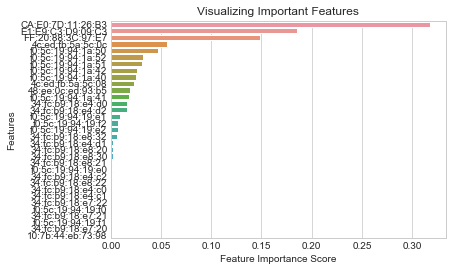

In [37]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestRegressor()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y)
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - MLP Regression Model

In [38]:
num_neurons_basic = 180
print("Default number of neurons: " + str(num_neurons_basic))
# Function to create model, required for KerasRegressor
def create_model(dim=2,num_neurons=num_neurons_basic,activation ='relu',optimizer = 'adam'):
    model = Sequential()
    model.add(Dense(num_neurons,input_dim=dim,activation=activation))
    model.add(Dense(num_neurons,activation=activation))
    model.add(Dense(2))
    model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy','mean_absolute_error'])
    return model
model = create_model()
display(model.summary())

Default number of neurons: 180
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 180)               540       
_________________________________________________________________
dense_2 (Dense)              (None, 180)               32580     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 362       
Total params: 33,482
Trainable params: 33,482
Non-trainable params: 0
_________________________________________________________________


None

In [39]:
def compute_MLP_with_Regression(dim=2,trainX_data = None,trainY_data = None,testX_data = None,testY_data = None,scaler = None,
                                    cross_validation = None,batch_size=10,epochs=25,verbose=0,num_neurons_param=180,
                          optimizer_func='adam',activation_func='relu'):
    # Init the MLP Regressor Estimator with the hyperparameters
    keras_regressor = KerasRegressor(build_fn=create_model,dim=dim,epochs=epochs,num_neurons=num_neurons_param,
                                     optimizer=optimizer_func,activation=activation_func,batch_size=batch_size,verbose=verbose)
    seed = 7
    np.random.seed(seed)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,keras_regressor)
    else:
        # Use Keras MLP Regression Default Estimator
        main_estimator = keras_regressor
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        # Compute Regression performance metrics
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    else:
        print("Cross Validation Activated. CV = " + str(cross_validation))
        # Fit and Predict the results of the testing data features using cross-validation
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation,groups=default_groups)
        # Compute Regression performance metrics
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = testY_data.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    return structure_data(result,coefficient_determination)

### Experiments

#### Check Training model with no cross validation
Use MLP Regressor to check the results on the training data alone

In [40]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)
    result = compute_MLP_with_Regression(dim=dim,trainX_data=trainX_data,trainY_data=train_Y,
                                   testX_data=trainX_data,testY_data=train_Y,
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

Instructions for updating:
Use tf.cast instead.


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
2,0.152694,0.036007,0.189755,0.112732,0.079601,0.123604,0.174610,0.350519,0.010174,1.115112,0.990998,Both
0,0.299035,0.136493,0.369449,0.217103,0.152940,0.250077,0.342246,0.745585,0.017755,1.753453,0.965877,WiFi
1,0.853124,1.022288,1.011083,0.543011,0.409661,0.774666,1.077398,1.834912,0.012008,2.769173,0.744428,BLE


#### Experiment - MLP with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

In [41]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)
    for cv in cross_validation_list:
        skf = StratifiedKFold(n_splits=cv)
        splited = skf.split(trainX_data,default_groups)
        result = compute_MLP_with_Regression(dim=dim,trainX_data=trainX_data,trainY_data=train_Y,
                                   testX_data=trainX_data,testY_data=train_Y,
                                   scaler=StandardScaler(),cross_validation=splited)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_fold = statistics.sort_values(by=['mae'])['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x000002708919C348>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x0000027087F050C8>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x0000027089E82948>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x00000270933C40C8>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x0000027094E229C8>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x0000027089E82948>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x00000270A4E49148>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x00000270AB5AC548>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x00000270A4E49148>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x00000270AB5AC548>
Cross Validation Activated. CV = <generator object _BaseKFold.split at 0x00000270B38E2AC8>

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,folds,type
24,0.509556,0.457969,0.676734,0.445631,0.199849,0.376150,0.582856,1.414050,0.014483,2.997544,0.885508,8,Both
25,0.517977,0.480977,0.693525,0.461477,0.208802,0.378316,0.595811,1.439794,0.007558,3.193294,0.879756,9,Both
26,0.520574,0.473223,0.687912,0.449995,0.207745,0.397417,0.602936,1.424073,0.011954,2.959176,0.881694,10,Both
23,0.526301,0.485750,0.696958,0.457204,0.200174,0.386138,0.614708,1.453780,0.004844,2.944180,0.878562,7,Both
22,0.551897,0.526036,0.725284,0.470894,0.222911,0.394941,0.639128,1.507793,0.017193,3.178079,0.868491,6,Both
21,0.558309,0.546697,0.739390,0.485080,0.225706,0.407530,0.640262,1.589836,0.011003,2.893851,0.863326,5,Both
20,0.573472,0.583367,0.763785,0.504814,0.231863,0.411233,0.645111,1.544598,0.030972,3.351286,0.854158,4,Both
19,0.615199,0.667665,0.817108,0.538128,0.241661,0.456271,0.713191,1.671019,0.003057,3.952818,0.833084,3,Both
18,0.696466,0.835942,0.914299,0.592745,0.274913,0.510101,0.808319,1.937109,0.016843,3.494081,0.791014,2,Both
8,0.708294,1.010825,1.005398,0.714020,0.246487,0.446211,0.751983,2.175391,0.003532,4.233023,0.747294,10,WiFi


Number of Folds:  8


#### Experiment - MLP with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

In [42]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns) 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = size, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_MLP_with_Regression(dim=dim,epochs=25,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                       scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,test_size,type
18,5.092539e-01,4.210607e-01,6.488919e-01,4.048538e-01,0.203319,0.376642,0.583908,1.253379,0.028651,2.097035e+00,8.947348e-01,0.1,Both
19,5.272057e-01,4.275010e-01,6.538356e-01,3.880192e-01,0.214256,0.434343,0.649511,1.225659,0.055415,2.026941e+00,8.931247e-01,0.2,Both
20,5.397946e-01,4.697780e-01,6.854035e-01,4.233157e-01,0.243009,0.425946,0.657875,1.413773,0.019757,1.965592e+00,8.825555e-01,0.3,Both
21,6.024283e-01,5.283973e-01,7.269094e-01,4.074688e-01,0.287706,0.505502,0.750865,1.417339,0.035774,1.927375e+00,8.679007e-01,0.4,Both
22,6.058599e-01,5.949822e-01,7.713509e-01,4.780433e-01,0.237356,0.477288,0.763429,1.531442,0.019658,2.765959e+00,8.512544e-01,0.5,Both
23,6.785312e-01,7.140528e-01,8.450164e-01,5.041956e-01,0.306151,0.562340,0.837506,1.674824,0.025728,3.008138e+00,8.214868e-01,0.6,Both
24,7.351344e-01,8.582119e-01,9.263973e-01,5.642658e-01,0.310827,0.592826,0.925309,1.785325,0.029214,3.431631e+00,7.854470e-01,0.7,Both
2,7.731019e-01,1.073657e+00,1.036174e+00,6.914446e-01,0.289431,0.521249,0.895222,2.039283,0.021920,3.735898e+00,7.315857e-01,0.3,WiFi
1,7.838250e-01,9.922089e-01,9.960968e-01,6.167358e-01,0.356737,0.601887,0.920049,1.952674,0.064213,3.745710e+00,7.519478e-01,0.2,WiFi
3,7.897617e-01,1.082564e+00,1.040463e+00,6.785094e-01,0.297334,0.596739,0.869161,2.201836,0.010970,3.347605e+00,7.293590e-01,0.4,WiFi


#### Experiment - MLP with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [43]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns) 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
    result = compute_MLP_with_Regression(testX_data=trainX_data,testY_data=train_Y,dim=dim,epochs=25,scaler=StandardScaler(),cross_validation = splited)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x000002714E6706C8>
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x000002716FDEA2C8>
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x0000027158F2A8C8>


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
1,1.424325,2.473476,1.572729,0.667359,0.954423,1.369679,1.739220,2.596081,0.100232,3.351572,0.381631,BLE
2,1.765094,3.819381,1.954324,0.839503,1.181986,1.751578,2.167981,3.189340,0.053204,4.588700,0.045155,Both
0,2.459466,7.305596,2.702887,1.121740,1.569720,2.476237,2.941045,4.464868,0.252532,5.354435,-0.826399,WiFi


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using MLP

In [44]:
selected_fold=8
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns) 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
    X_train_split = X_train_split.reset_index(drop=True)
    X_test_split = X_test_split.reset_index(drop=True)
    y_train_split = y_train_split.reset_index(drop=True)
    y_test_split = y_test_split.reset_index(drop=True)
    holdout = compute_MLP_with_Regression(verbose=1,dim=dim,epochs=25,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
    loo = compute_MLP_with_Regression(testX_data=trainX_data,dim=dim,epochs=25,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skf = StratifiedKFold(n_splits=selected_fold)
    splited = skf.split(trainX_data,default_groups)
    skfold = compute_MLP_with_Regression(testX_data=trainX_data,dim=dim,epochs=25,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_method = 'LOO'
print("Selected cross validation method: ",selected_method)

Epoch 1/25
525/525 [==============================] - 5s 10ms/step - loss: 1.5648 - accuracy: 0.6438 - mean_absolute_error: 1.0174
Epoch 2/25
525/525 [==============================] - 1s 2ms/step - loss: 1.0287 - accuracy: 0.7295 - mean_absolute_error: 0.8076
Epoch 3/25
525/525 [==============================] - 1s 2ms/step - loss: 0.7937 - accuracy: 0.7962 - mean_absolute_error: 0.6798
Epoch 4/25
525/525 [==============================] - 1s 2ms/step - loss: 0.6513 - accuracy: 0.8152 - mean_absolute_error: 0.5961: 0s - loss: 0.6479 - accuracy: 0.7935 - mean_absolu
Epoch 5/25
525/525 [==============================] - 1s 2ms/step - loss: 0.5766 - accuracy: 0.8324 - mean_absolute_error: 0.5599: 0s - loss: 0.5886 - accuracy: 0.8348 - mean_absolute_error: 
Epoch 6/25
525/525 [==============================] - 1s 2ms/step - loss: 0.5152 - accuracy: 0.8362 - mean_absolute_error: 0.5160
Epoch 7/25
525/525 [==============================] - 1s 2ms/step - loss: 0.4469 - accuracy: 0.8514 - mea

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,method,type
8,0.510667,0.459761,0.678057,0.446370,0.204528,0.370239,0.592529,1.395442,0.009274,2.997306,0.885060,Stratified K-Fold,Both
7,0.539795,0.469778,0.685404,0.423316,0.243009,0.425946,0.657875,1.413773,0.019757,1.965592,0.882555,HoldOut,Both
2,0.711657,1.007143,1.003565,0.708065,0.228615,0.459213,0.798049,2.226425,0.004892,4.246653,0.748214,Stratified K-Fold,WiFi
1,0.768311,1.074839,1.036745,0.697640,0.285792,0.512303,0.864610,2.085173,0.041618,3.696673,0.731290,HoldOut,WiFi
5,0.935198,1.241826,1.114373,0.606400,0.456437,0.815283,1.193935,2.067623,0.006736,2.889912,0.689543,Stratified K-Fold,BLE
4,0.945189,1.317134,1.147664,0.652413,0.465352,0.788459,1.192563,2.245698,0.032365,3.009563,0.670717,HoldOut,BLE
3,1.420310,2.462375,1.569196,0.667599,0.953274,1.362557,1.734578,2.593898,0.100232,3.351493,0.384406,LOO,BLE
6,1.759624,3.779412,1.944071,0.827071,1.194564,1.730381,2.166091,3.166879,0.065199,4.588698,0.055147,LOO,Both
0,2.461641,7.294691,2.700869,1.112055,1.585823,2.465727,2.941037,4.463789,0.264704,5.282138,-0.823673,LOO,WiFi


Selected cross validation method:  LOO


#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

In [45]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    for preprocess in scaler_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_MLP_with_Regression(dim=dim,testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_MLP_with_Regression(dim=dim,testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_MLP_with_Regression(dim=dim,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['preprocessing'],statistics['mae'])
selected_preprocessing = statistics.sort_values(by=['mae'])['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['mae'])['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x000002719CD257C8>
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x00000272211718C8>
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x000002723250A148>
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x000002724EFD46C8>
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x00000272629DD0C8>
Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x0000027259C81148>


KeyboardInterrupt: 

#### Experiment - Hyperparameter Optimization (Number of neurons per Layer)

In [44]:
statistical_cols = ['neurons','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasRegressor(build_fn=create_model,dim=dim, epochs=15, batch_size=10, verbose=0)
    param_grid = dict(num_neurons=neurons)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['num_neurons'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_number_neurons = statistics.sort_values(by=['neurons'])['neurons'].head(1).values[0]
print("Selected Number Neurons: ",selected_number_neurons)

Best: -2.383751 using {'num_neurons': 300}
-5.128067 (2.597659) with: {'num_neurons': 100}
-2.383751 (1.191532) with: {'num_neurons': 300}
-5.421276 (3.062618) with: {'num_neurons': 400}
-3.883003 (2.175817) with: {'num_neurons': 500}
-3.350002 (1.593288) with: {'num_neurons': 600}


D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: -1.683438 using {'num_neurons': 100}
-1.683438 (0.966316) with: {'num_neurons': 100}
-1.781076 (0.947908) with: {'num_neurons': 300}
-2.093195 (0.918692) with: {'num_neurons': 400}
-1.759936 (0.735331) with: {'num_neurons': 500}
-1.833618 (0.972852) with: {'num_neurons': 600}
Best: -2.181373 using {'num_neurons': 300}
-3.499408 (1.514506) with: {'num_neurons': 100}
-2.181373 (1.482071) with: {'num_neurons': 300}
-2.593073 (1.544883) with: {'num_neurons': 400}
-2.590163 (1.315694) with: {'num_neurons': 500}
-2.267803 (0.890329) with: {'num_neurons': 600}


,neurons,type
0,300,WiFi
1,100,BLE
2,300,Both


Selected Number Neurons:  100


#### Experiment - Hyperparameter Optimization (Batch Size and Epochs)

In [45]:
statistical_cols = ['batch_size','epochs','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasRegressor(build_fn=create_model,dim=dim, verbose=0)
    param_grid = dict(batch_size=batch_size, epochs=epochs)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['batch_size'])
    result.append(grid_result.best_params_['epochs'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_batch_size = statistics.sort_values(by=['batch_size'])['batch_size'].head(1).values[0]
print("Selected Batch Size: ",selected_batch_size)
selected_epochs = statistics.sort_values(by=['epochs'])['epochs'].head(1).values[0]
print("Selected Epochs: ",selected_epochs)

D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: -3.435327 using {'batch_size': 100, 'epochs': 10}
-4.475453 (2.221867) with: {'batch_size': 10, 'epochs': 10}
-3.917719 (2.385829) with: {'batch_size': 10, 'epochs': 50}
-3.647990 (1.344637) with: {'batch_size': 10, 'epochs': 100}
-4.558411 (2.205694) with: {'batch_size': 20, 'epochs': 10}
-3.724094 (2.085241) with: {'batch_size': 20, 'epochs': 50}
-3.441245 (2.262015) with: {'batch_size': 20, 'epochs': 100}
-4.164700 (1.375446) with: {'batch_size': 40, 'epochs': 10}
-4.250435 (1.914461) with: {'batch_size': 40, 'epochs': 50}
-3.911167 (1.862076) with: {'batch_size': 40, 'epochs': 100}
-3.582962 (1.489987) with: {'batch_size': 60, 'epochs': 10}
-3.439508 (1.779702) with: {'batch_size': 60, 'epochs': 50}
-4.164252 (1.866196) with: {'batch_size': 60, 'epochs': 100}
-4.136680 (1.514035) with: {'batch_size': 80, 'epochs': 10}
-3.653645 (2.005923) with: {'batch_size': 80, 'epochs': 50}
-3.988681 (3.886229) with: {'batch_size': 80, 'epochs': 100}
-3.435327 (1.635863) with: {'batch_size

,batch_size,epochs,type
0,100,10,WiFi
1,20,10,BLE
2,60,50,Both


Selected Batch Size:  20
Selected Epochs:  10


#### Experiment - Hyperparameter Optimization (Optimization Algorithm)

In [46]:
statistical_cols = ['optimization_algorithm','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasRegressor(build_fn=create_model,dim=dim,epochs=50, batch_size=10, verbose=0)
    param_grid = dict(optimizer=optimizer)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['optimizer'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_optimization_algorithm = statistics.sort_values(by=['optimization_algorithm'])['optimization_algorithm'].head(1).values[0]
print("Selected Optimization Algorithm: ",selected_optimization_algorithm)

D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: -3.082922 using {'optimizer': 'Adamax'}
nan (nan) with: {'optimizer': 'SGD'}
-3.312794 (1.352302) with: {'optimizer': 'RMSprop'}
-3.412326 (2.572279) with: {'optimizer': 'Adagrad'}
-3.201688 (1.017675) with: {'optimizer': 'Adadelta'}
-3.646275 (2.740425) with: {'optimizer': 'Adam'}
-3.082922 (2.025330) with: {'optimizer': 'Adamax'}
-3.657386 (1.204606) with: {'optimizer': 'Nadam'}
Best: -1.542773 using {'optimizer': 'Adam'}
nan (nan) with: {'optimizer': 'SGD'}
-1.570505 (0.530238) with: {'optimizer': 'RMSprop'}
-1.624026 (0.877001) with: {'optimizer': 'Adagrad'}
-1.659268 (0.627127) with: {'optimizer': 'Adadelta'}
-1.542773 (0.638759) with: {'optimizer': 'Adam'}
-1.681339 (0.791784) with: {'optimizer': 'Adamax'}
-1.627319 (0.815593) with: {'optimizer': 'Nadam'}
Best: -2.068479 using {'optimizer': 'Nadam'}
nan (nan) with: {'optimizer': 'SGD'}
-2.424474 (1.068516) with: {'optimizer': 'RMSprop'}
-2.435298 (1.064455) with: {'optimizer': 'Adagrad'}
-2.296439 (1.173459) with: {'optimiz

,optimization_algorithm,type
0,Adamax,WiFi
1,Adam,BLE
2,Nadam,Both


Selected Optimization Algorithm:  Adam


#### Experiment - Hyperparameter Optimization (Learning Rate and Momentum)

In [49]:
from keras.optimizers import SGD
def create_model_SGD(dim=2,learn_rate=0.01, momentum=0):
    model = Sequential()
    model.add(Dense(num_neurons_basic,input_dim=dim,activation='relu'))
    model.add(Dense(num_neurons_basic,activation='relu'))
    model.add(Dense(2))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy','mean_absolute_error'])
    return model

In [50]:
statistical_cols = ['learning_rate','momentum','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasRegressor(build_fn=create_model_SGD,dim=dim,epochs=50, batch_size=10, verbose=0)
    param_grid = dict(learn_rate=learn_rate, momentum=momentum)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['learn_rate'])
    result.append(grid_result.best_params_['momentum'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_learning_rate = statistics.sort_values(by=['learning_rate'])['learning_rate'].head(1).values[0]
print("Selected Learing Rate: ",selected_learning_rate)
selected_momentum = statistics.sort_values(by=['momentum'])['momentum'].head(1).values[0]
print("Selected Momentum: ",selected_momentum)

D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: nan using {'learn_rate': 0.001, 'momentum': 0.0}
nan (nan) with: {'learn_rate': 0.001, 'momentum': 0.0}
nan (nan) with: {'learn_rate': 0.001, 'momentum': 0.2}
nan (nan) with: {'learn_rate': 0.001, 'momentum': 0.4}
nan (nan) with: {'learn_rate': 0.001, 'momentum': 0.6}
nan (nan) with: {'learn_rate': 0.001, 'momentum': 0.8}
nan (nan) with: {'learn_rate': 0.001, 'momentum': 0.9}
nan (nan) with: {'learn_rate': 0.01, 'momentum': 0.0}
nan (nan) with: {'learn_rate': 0.01, 'momentum': 0.2}
nan (nan) with: {'learn_rate': 0.01, 'momentum': 0.4}
nan (nan) with: {'learn_rate': 0.01, 'momentum': 0.6}
nan (nan) with: {'learn_rate': 0.01, 'momentum': 0.8}
nan (nan) with: {'learn_rate': 0.01, 'momentum': 0.9}
nan (nan) with: {'learn_rate': 0.1, 'momentum': 0.0}
nan (nan) with: {'learn_rate': 0.1, 'momentum': 0.2}
nan (nan) with: {'learn_rate': 0.1, 'momentum': 0.4}
nan (nan) with: {'learn_rate': 0.1, 'momentum': 0.6}
nan (nan) with: {'learn_rate': 0.1, 'momentum': 0.8}
nan (nan) with: {'learn_ra

,learning_rate,momentum,type
0,0.001,0.0,WiFi
1,0.001,0.0,BLE
2,0.001,0.0,Both


Selected Learing Rate:  0.001
Selected Momentum:  0.0


#### Experiment - Hyperparameter Optimization (Activation Function)

In [51]:
statistical_cols = ['activation_function','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)  
    model = KerasRegressor(build_fn=create_model,dim=dim,epochs=50,batch_size=10,verbose=0)
    param_grid = dict(activation=activation)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_['activation'])
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
selected_activation_function = statistics.sort_values(by=['activation_function'])['activation_function'].head(1).values[0]
print("Selected Activation Function: ",selected_activation_function)

D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: -2.367999 using {'activation': 'softsign'}
-2.489788 (0.930752) with: {'activation': 'softmax'}
-3.449378 (1.666765) with: {'activation': 'softplus'}
-2.367999 (0.953715) with: {'activation': 'softsign'}
-3.768644 (2.940146) with: {'activation': 'relu'}
-2.633909 (0.853980) with: {'activation': 'tanh'}
-2.406261 (0.913824) with: {'activation': 'sigmoid'}
-2.536717 (0.920807) with: {'activation': 'hard_sigmoid'}
-5.090412 (2.920927) with: {'activation': 'linear'}
Best: -1.340319 using {'activation': 'sigmoid'}
-2.148294 (0.744170) with: {'activation': 'softmax'}
-2.227084 (1.856008) with: {'activation': 'softplus'}
-1.540074 (0.576920) with: {'activation': 'softsign'}
-1.447402 (0.702878) with: {'activation': 'relu'}
-1.520968 (0.502357) with: {'activation': 'tanh'}
-1.340319 (0.437383) with: {'activation': 'sigmoid'}
-1.542431 (0.671755) with: {'activation': 'hard_sigmoid'}
-2.978961 (1.446492) with: {'activation': 'linear'}
Best: -2.486816 using {'activation': 'softmax'}
-2.4868

,activation_function,type
0,softsign,WiFi
1,sigmoid,BLE
2,softmax,Both


Selected Activation Function:  sigmoid


#### Run RandomizedSearchCV for parameter tunning

In [52]:
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    result = list()
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns)
    model = KerasRegressor(build_fn=create_model,dim=dim,epochs=25,batch_size=10,verbose=0)
    param_grid = dict(activation=activation,optimizer=optimizer,num_neurons=neurons)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,n_iter=25, n_jobs=-1, cv=selected_fold)
    grid_result = grid.fit(trainX_data, train_Y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    result.append(grid_result.best_params_)
    result.append(feature)
    results.append(result)
gridcv_results = pd.DataFrame(results)
display(gridcv_results)

D:\Programs\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: -2.284559 using {'optimizer': 'SGD', 'num_neurons': 100, 'activation': 'sigmoid'}
nan (nan) with: {'optimizer': 'SGD', 'num_neurons': 500, 'activation': 'relu'}
-5.217815 (4.859953) with: {'optimizer': 'Adam', 'num_neurons': 400, 'activation': 'linear'}
-2.560098 (1.028657) with: {'optimizer': 'Adagrad', 'num_neurons': 600, 'activation': 'sigmoid'}
-3.468931 (1.853383) with: {'optimizer': 'Adadelta', 'num_neurons': 500, 'activation': 'tanh'}
-2.554116 (1.234445) with: {'optimizer': 'RMSprop', 'num_neurons': 400, 'activation': 'softplus'}
-3.257179 (1.098638) with: {'optimizer': 'Adamax', 'num_neurons': 100, 'activation': 'softsign'}
-2.657938 (1.214292) with: {'optimizer': 'Adam', 'num_neurons': 500, 'activation': 'tanh'}
-2.492799 (0.927729) with: {'optimizer': 'Adadelta', 'num_neurons': 400, 'activation': 'softmax'}
-3.929356 (1.896659) with: {'optimizer': 'Adamax', 'num_neurons': 100, 'activation': 'relu'}
-2.371575 (0.912407) with: {'optimizer': 'Nadam', 'num_neurons': 400, '

,0,1
0,"{'optimizer': 'SGD', 'num_neurons': 100, 'acti...",WiFi
1,"{'optimizer': 'Adamax', 'num_neurons': 100, 'a...",BLE
2,"{'optimizer': 'Adamax', 'num_neurons': 500, 'a...",Both


### Best Parameters
Display the best parameters tunned throughout the experiments

In [46]:
selected_number_neurons = 100
selected_activation_function = 'sigmoid'
selected_batch_size = 20
selected_epochs = 10
selected_optimization_algorithm = 'Adam'
selected_learning_rate = 0.001
selected_momentum = 0.0
selected_preprocessing = 'StandardScaler'
conclusion_cols=['Cross_Validation','Number of Neurons','Activation Function','Batch Size','Epochs','Optimizer','Learning Rate',
                 'Momentum','Preprocessing']
conclusion_list = [selected_method,selected_number_neurons,selected_activation_function,selected_batch_size,selected_epochs,
                   selected_optimization_algorithm,selected_learning_rate,selected_momentum,selected_preprocessing]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,Cross_Validation,Number of Neurons,Activation Function,Batch Size,Epochs,Optimizer,Learning Rate,Momentum,Preprocessing
0,LOO,100,sigmoid,20,10,Adam,0.001,0.0,StandardScaler


### Best Results

In [ ]:
sm='LOO'
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tunning']
results = list()
final_results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
        dim = len(train_wifi.columns)
    elif feature == 'BLE':
        trainX_data = train_ble
        dim = len(train_ble.columns)
    else:
        trainX_data = X_train 
        dim = len(X_train.columns) 
    if sm == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y,groups=default_groups)
        result = compute_MLP_with_Regression(testX_data=trainX_data,testY_data=train_Y,dim=dim,epochs=25,scaler=StandardScaler(),
                                             cross_validation = splited,num_neurons_param=selected_number_neurons,activation_func=selected_activation_function,
                                    batch_size=selected_batch_size,optimizer_func=selected_optimization_algorithm) 
    elif sm =='Stratified K-Fold':
        skf = StratifiedKFold(n_splits=selected_fold)
        splited = skf.split(trainX_data,default_groups)
        result = compute_MLP_with_Regression(testX_data=trainX_data,testY_data=train_Y,dim=dim,epochs=25,scaler=StandardScaler(),
                                             cross_validation = splited,num_neurons_param=selected_number_neurons,activation_func=selected_activation_function,
                                    batch_size=selected_batch_size,optimizer_func=selected_optimization_algorithm,verbose=1)  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_MLP_with_Regression(dim=dim,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,epochs=25,
                             scaler=StandardScaler(),num_neurons_param=selected_number_neurons,activation_func=selected_activation_function,
                                    batch_size=selected_batch_size,optimizer_func=selected_optimization_algorithm,verbose=1)  
    result.append(feature)
    result.append(True)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

Cross Validation Activated. CV = <generator object BaseCrossValidator.split at 0x0000027087DF4248>


### Best Result - Testing (Home | BLE)

In [98]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_X
dim = len(train_ble.columns)
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        keras_regression_model = KerasRegressor(build_fn=create_model,dim=dim,epochs=50,
                                                             num_neurons=selected_number_neurons,
                                                             optimizer=selected_optimization_algorithm,
                                                             activation=selected_activation_function,
                                                             batch_size=10,verbose=0)
    else: 
        keras_regression_model = KerasRegressor(build_fn=create_model,dim=dim)
    trainX_data = scaler.transform(trainX_data)
    keras_regression_model.fit(trainX_data,train_Y)
    predict_test = keras_regression_model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

Epoch 1/1
750/750 [==============================] - 6s 8ms/step - loss: 2.2908 - accuracy: 0.5907 - mean_absolute_error: 1.2951


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
1,1.201112,1.809677,1.345242,0.608154,0.659429,1.342830,1.601132,2.189457,0.194059,2.257465,-0.366991,None,False
0,2.670382,8.362080,2.891726,1.113860,1.810757,2.815073,3.291429,4.529670,0.494134,5.544272,-4.684631,None,True


### Best Result - Testing (Home | BLE)

In [99]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_home_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        keras_regression_model = KerasRegressor(build_fn=create_model,dim=dim,epochs=50,
                                                             num_neurons=selected_number_neurons,
                                                             optimizer=selected_optimization_algorithm,
                                                             activation=selected_activation_function,
                                                             batch_size=10,verbose=0)
    else: 
        keras_regression_model = KerasRegressor(build_fn=create_model,dim=dim)
    trainX_data = scaler.transform(trainX_data)
    keras_regression_model.fit(trainX_data,train_Y)
    predict_test = keras_regression_model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_home_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_home_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

Epoch 1/1
750/750 [==============================] - 7s 10ms/step - loss: 2.3251 - accuracy: 0.5840 - mean_absolute_error: 1.3081


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
1,1.406280,2.495426,1.579692,0.722368,0.776796,1.583649,1.981364,2.632281,0.172694,2.690279,-0.918899,None,False
0,2.379903,6.367422,2.523375,0.841983,1.683450,2.456183,2.832614,3.664037,0.873135,4.638392,-3.480985,None,True


### Results Display

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,0.879875,1.056934,1.028073,0.532931,0.467370,0.817281,1.049216,1.875221,0.048667,2.893195,0.735767,Both,True
1,1.336050,2.246456,1.498818,0.681912,0.838859,1.379896,1.746037,2.479646,0.204507,2.516000,-0.760604,None,False
2,1.406280,2.495426,1.579692,0.722368,0.776796,1.583649,1.981364,2.632281,0.172694,2.690279,-0.918899,None,False


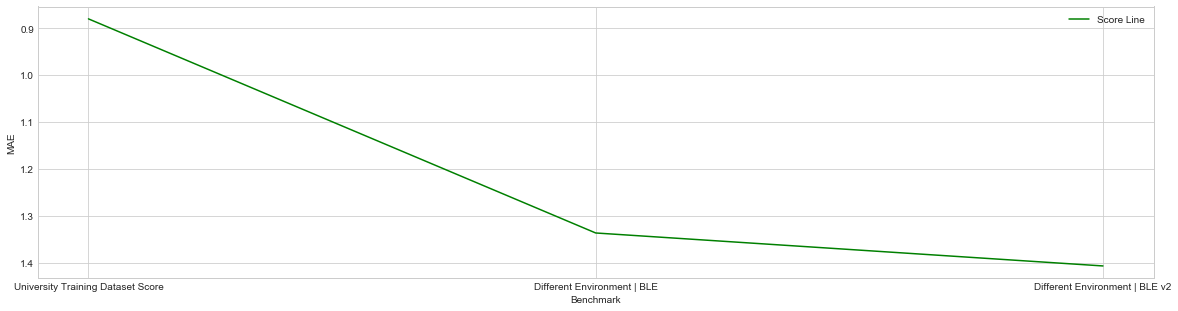

In [101]:
del final_results[2]
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
types = ['University Training Dataset Score','Different Environment | BLE','Different Environment | BLE v2']
results = pd.DataFrame(data=final_results,columns=statistical_cols)
display(results.sort_values(by=['mae']))
plt.figure(figsize=(20,5))
plt.plot(types,results['mae'],color='green',label='Score Line')
plt.xlabel('Benchmark')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.show()